In this example, we analyse breast cancer images. We use the following dataset:

Al-Dhabyani W, Gomaa M, Khaled H, Fahmy A. Dataset of breast ultrasound images. Data in Brief. 2020 Feb;28:104863. DOI: 10.1016/j.dib.2019.104863.

https://www.sciencedirect.com/science/article/pii/S2352340919312181

In [1]:
![[ ! -f "Dataset_BUSI.zip" && ! -d "Dataset_BUSI_with_GT" ]] && wget -q --show-progress https://scholar.cu.edu.eg/Dataset_BUSI.zip || echo "Data already downloaded"
![[ ! -d "Dataset_BUSI_with_GT" ]] && unzip Dataset_BUSI.zip || echo "Data already extracted"

Data already downloaded
Data already extracted


In [2]:
!pip3 install opencv-python
ocv_info = !pip3 show opencv-python

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: gosam 2.1.1-4b98559 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gosam or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: professor2 X.Y.Z has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of professor2 or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
import sys
sys.path.append(ocv_info[7].split(":")[1].strip())

In [4]:
import os
os.sys.path

['/eos/home-i01/k/karolos/MIAI/SWAN',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/itk',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/python',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib',
 '',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages',
 '/usr/local/lib/swan/nb_term_lib',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc11-opt/lib/python39.zip',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc11-opt/lib/python3.9',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc11-opt/lib/python3.9/lib-dynload',
 '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc11-opt/lib/python3.9/site-packages',
 '/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/IPython/extensions',
 '/home/karolos/.ipython',
 '/eos/home-i01/k/karolos/.local/lib/python

In [5]:
folder_name = './Dataset_BUSI_with_GT'
files_names = ['benign', 'malignant', 'normal']

import os
import cv2
import random

from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

# Size of images in pixels (can be adjusted/studied)
img_sz=300

def create_training_data():
    training_data = []
    for file in files_names:
        path = os.path.join(folder_name, file)
        class_num = files_names.index(file)
        print(file,class_num)
        
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_sz, img_sz))  # Include resizing
            training_data.append([new_array, class_num])
    return training_data

training_data = create_training_data()
random.shuffle(training_data)

benign 0


  0%|          | 0/891 [00:00<?, ?it/s]

malignant 1


  0%|          | 0/421 [00:00<?, ?it/s]

normal 2


  0%|          | 0/266 [00:00<?, ?it/s]

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
import seaborn as sns
tf.random.set_seed(3)

2024-12-02 12:45:41.731693: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-02 12:45:41.802219: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(img_sz,img_sz)),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(3, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense (Dense)               (None, 256)               23040256  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 1

2024-12-02 12:45:48.424361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 12:45:48.437334: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-02 12:45:48.437566: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
X=[]
y=[]
for feature,label in training_data:
    X.append(feature)
    y.append(label)
X=np.array(X)
y=np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train/255
X_test = X_test/255

In [9]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history=model.fit(X_train, y_train, epochs=10,validation_split=0.1)

Epoch 1/10


2024-12-02 12:45:51.920026: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8ee27c2290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-02 12:45:51.920088: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-02 12:45:51.926332: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-02 12:45:51.945683: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-12-02 12:45:52.095157: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


36/36 [==============================] - 4s 23ms/step - loss: 1.8322 - accuracy: 0.4890 - val_loss: 1.8096 - val_accuracy: 0.6378
Epoch 2/10
36/36 [==============================] - 0s 11ms/step - loss: 1.4698 - accuracy: 0.5991 - val_loss: 0.9994 - val_accuracy: 0.6614
Epoch 3/10
36/36 [==============================] - 0s 11ms/step - loss: 0.8893 - accuracy: 0.6176 - val_loss: 0.7359 - val_accuracy: 0.7008
Epoch 4/10
36/36 [==============================] - 0s 11ms/step - loss: 0.7998 - accuracy: 0.6960 - val_loss: 0.7717 - val_accuracy: 0.6772
Epoch 5/10
36/36 [==============================] - 0s 10ms/step - loss: 0.7356 - accuracy: 0.7313 - val_loss: 0.8297 - val_accuracy: 0.6142
Epoch 6/10
36/36 [==============================] - 0s 11ms/step - loss: 0.7496 - accuracy: 0.7207 - val_loss: 0.6867 - val_accuracy: 0.7244
Epoch 7/10
36/36 [==============================] - 0s 11ms/step - loss: 0.7574 - accuracy: 0.7260 - val_loss: 0.9477 - val_accuracy: 0.5591
Epoch 8/10
36/36 [======

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuarcy of the model is : {accuracy*100:.2f} %")

10/10 [==============================] - 0s 5ms/step - loss: 0.8448 - accuracy: 0.7215
Accuarcy of the model is : 72.15 %


10/10 [==============================] - 0s 5ms/step


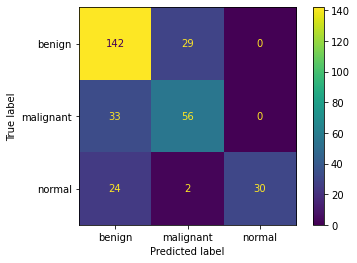

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = [np.argmax(i) for i in model.predict(X_test)]
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=files_names).plot()

This network performs quite nicely. Most importantly, it doesn't classify benign or malignant tissue as normal. It does classify a few times normal tissue as malignant. (Note this might not be the case, depending on your traninig.) It does, however, tend to over-predict benign for normal, and, worse, for malignant tissue. This could be an issue. It does predict some benign tissue to be malignant, which is not ideal, but they can at least be followed-up by a medical practitioner.